In [166]:
import tensorflow as tf
import matplotlib.pylab as plt
import os
import numpy as np
from tensorflow import keras

In [223]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:5000]
train_labels = train_labels[:5000]

test_images = test_images[:833]
test_labels = test_labels[:833]

train_images = train_images / 255.0
test_images = test_images / 255.0

In [224]:
def create_model():
    return keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(30, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

In [237]:
hists = []
RATES = [0.1] #0.01, 0.05, .1, .5 
EPOCHS=200
for lr in RATES:
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    hists.append(model.fit(train_images, train_labels, verbose=0, validation_data=(test_images, test_labels), epochs=EPOCHS))        

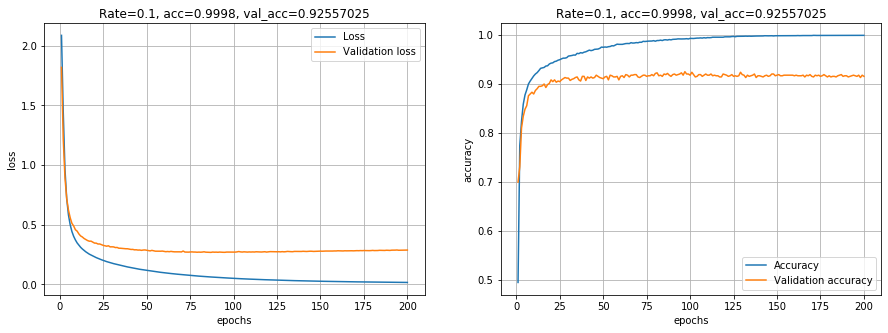

In [238]:
fig, axes_list = plt.subplots(len(hists), 2)
axes_list = axes_list.flatten()
fig.set_size_inches((15, 5))
for i in range(len(hists)):
    hist = hists[i]
    ax = axes_list[2*i]
    best_train_accuracy = max(hist.history['accuracy'])
    best_validation_accuracy = max(hist.history['val_accuracy'])        
    
    ax.set(xlabel='epochs', 
           ylabel='loss', 
           title='Rate=%s, acc=%s, val_acc=%s' % (RATES[i], best_train_accuracy, best_validation_accuracy))
    ax.plot(range(1, len(hist.history['loss']) + 1, 1), hist.history['loss'], '-', label="Loss")
    ax.plot(range(1, len(hist.history['loss']) + 1, 1), hist.history['val_loss'], '-', label="Validation loss")
    ax.grid()
    ax.legend()
    
    ax = axes_list[2*i + 1]
    ax.set(xlabel='epochs', 
           ylabel='accuracy', 
           title='Rate=%s, acc=%s, val_acc=%s' % (RATES[i], best_train_accuracy, best_validation_accuracy))
    ax.plot(range(1, len(hist.history['accuracy']) + 1, 1), hist.history['accuracy'], '-', label="Accuracy")
    ax.plot(range(1, len(hist.history['val_accuracy']) + 1, 1), hist.history['val_accuracy'], '-', label="Validation accuracy")
    ax.grid()
    ax.legend()
    
    
plt.show()    